In [38]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn.preprocessing import OneHotEncoder 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from scipy.linalg import lstsq
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('car_price_dataset.csv')

## Data Exploration and EDA

In [4]:
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [5]:
'''the data is reasonably good.
all values are in range there is no outliers at the moment'''
df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [6]:
# the data set has no wrong data type and no columns.
# and no wrong spelling or named columns
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


Brand            object
Model            object
Year              int64
Engine_Size     float64
Fuel_Type        object
Transmission     object
Mileage           int64
Doors             int64
Owner_Count       int64
Price             int64
dtype: object

In [7]:
# the dataset has no null values.
df.isnull().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [8]:
# looking for duplicates
## there are no duplicated values in the data set.
df.duplicated().sum()

0

## Data Visualiztion 

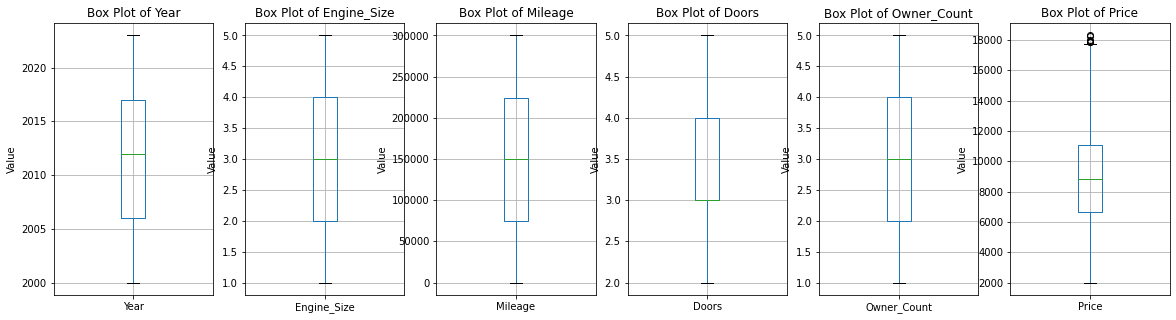

In [9]:
# Create boxplots to look for outliers.
# there are no outliers except some records in the target value (Price)
numerical_cols = df.select_dtypes(include=['int64','float64']).dtypes.index

fig, axes = plt.subplots(1, len(numerical_cols), figsize=(20, 5))

for i, col in enumerate(numerical_cols):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_ylabel('Value')



In [10]:
def get_value_counts(data):
    for i in data.columns:
        print(df[i].value_counts())
        print('                            ')
        print('----------------------------------------------')
        print('                            ')

In [11]:
get_value_counts(df)

Ford          1048
Audi          1038
Volkswagen    1020
Honda         1009
Chevrolet     1003
BMW            999
Hyundai        995
Kia            976
Toyota         970
Mercedes       942
Name: Brand, dtype: int64
                            
----------------------------------------------
                            
Accord      365
Fiesta      363
Impala      355
5 Series    353
Tiguan      352
Focus       351
Q5          350
A4          350
Elantra     347
Golf        339
A3          338
Optima      336
Civic       336
3 Series    335
Explorer    334
Malibu      333
Tucson      329
Passat      329
Rio         327
Corolla     325
RAV4        324
Camry       321
E-Class     321
Sonata      319
Equinox     315
GLA         315
Sportage    313
X5          311
CR-V        308
C-Class     306
Name: Model, dtype: int64
                            
----------------------------------------------
                            
2002    462
2011    449
2023    448
2012    437
2017    433
2010    

C:\Users\alaa_\AppData\Local\Temp/ipykernel_15288/7305111.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(df[col].value_counts().index,rotation = 45)
C:\Users\alaa_\AppData\Local\Temp/ipykernel_15288/7305111.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(df[col].value_counts().index,rotation = 45)
C:\Users\alaa_\AppData\Local\Temp/ipykernel_15288/7305111.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(df[col].value_counts().index,rotation = 45)


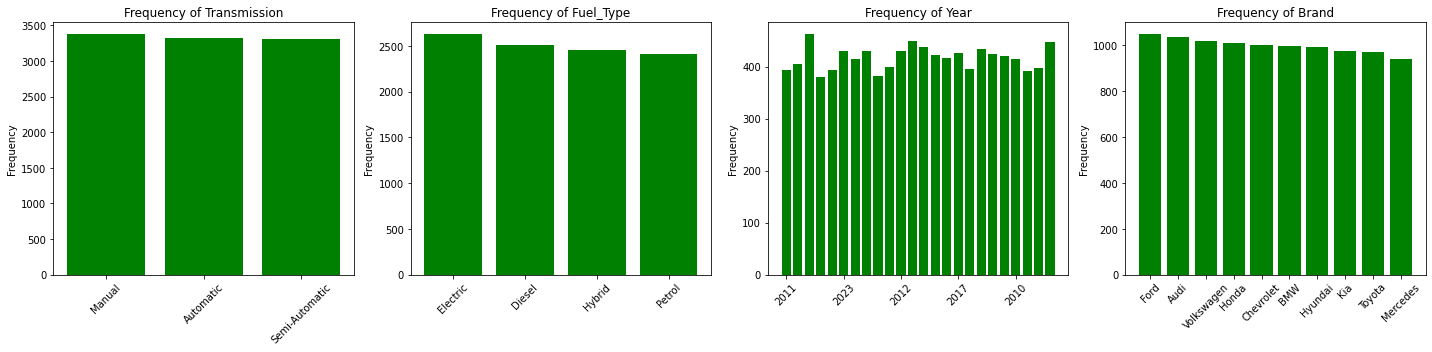

In [12]:
# Bar plots to figure which value seem to occur in the dataset frequently
## the dataset seems to have consistent values in most of columns 
bar_columns = ['Transmission', 'Fuel_Type', 'Year', 'Brand']

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, col in enumerate(df[bar_columns]):
    axes[i].bar(df[col].value_counts().index, df[col].value_counts().values, color='green')
    axes[i].set_title(f'Frequency of {col}')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xticklabels(df[col].value_counts().index,rotation = 45)
    
    plt.tight_layout()

Text(0, 0.5, 'Ferquency')

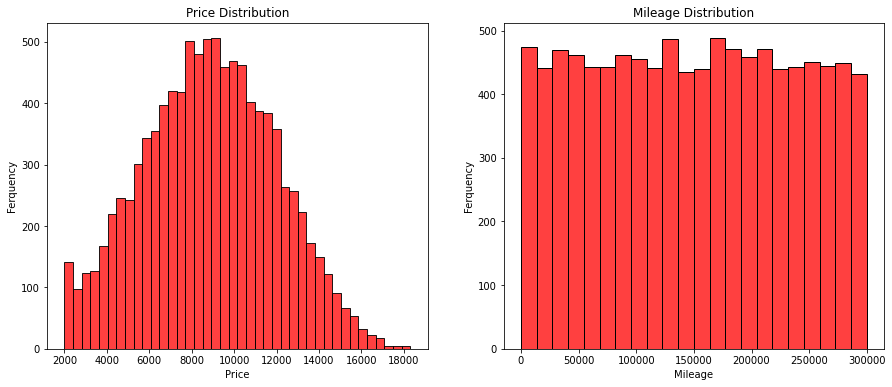

In [13]:
# Distribution graph of both Price and Transmission values
## the 'Mileage Distribution' doesn't show a big difference while the 'Price Distribution' shows that as expected the amount of cars decrease when the price goes higher.
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(df['Price'], ax=axes[0], color='red')
sns.histplot(df['Mileage'], ax=axes[1], color='red')
axes[0].set_title('Price Distribution')
axes[1].set_title('Mileage Distribution')
axes[0].set_ylabel('Ferquency')
axes[1].set_ylabel('Ferquency')


<AxesSubplot:xlabel='Price', ylabel='Year'>

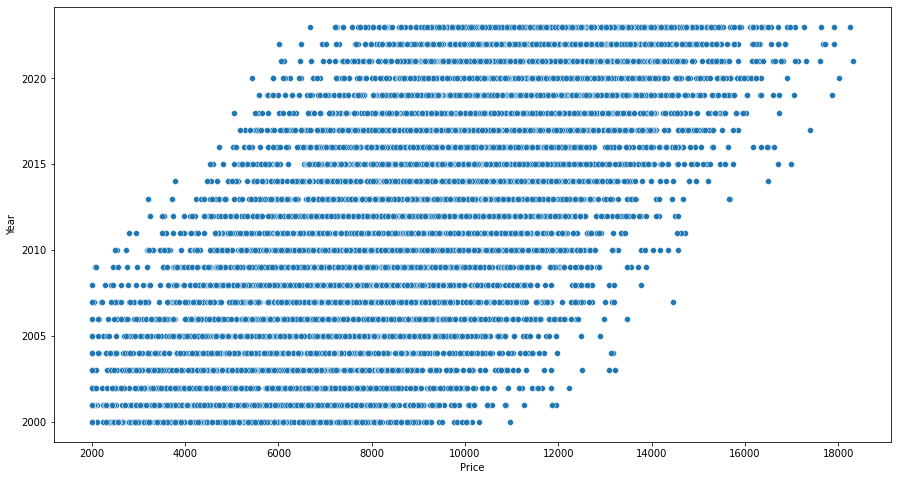

In [14]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df['Price'], y=df['Year'])

Text(0.5, 1.0, 'Price VS Fuel_Type')

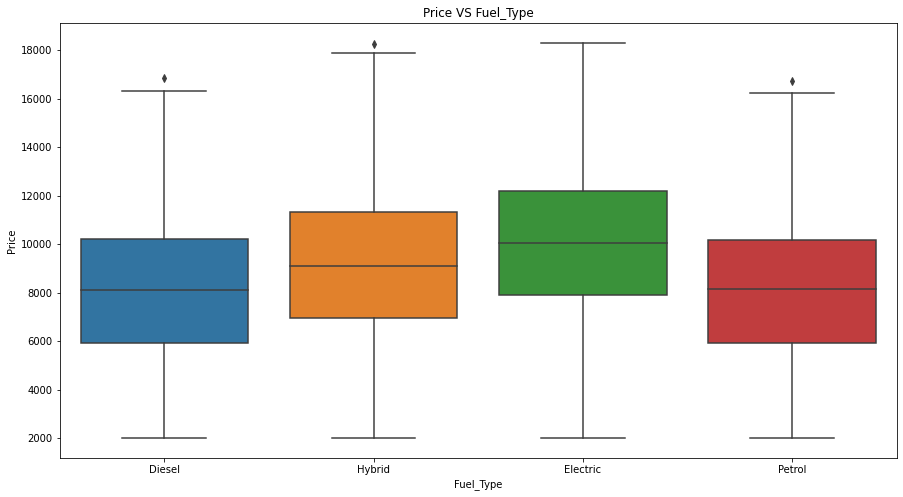

In [15]:
# boxplot between fuel_type (e.g., Petrol, Electric ) and the Price
## The plot shows that the average price goes up if the car contains an electric engine
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='Fuel_Type', y='Price')
plt.title('Price VS Fuel_Type')

In [16]:
df['Mileage'].describe()

count     10000.000000
mean     149239.111800
std       86322.348957
min          25.000000
25%       74649.250000
50%      149587.000000
75%      223577.500000
max      299947.000000
Name: Mileage, dtype: float64

## Pre-Processing the Data

In [17]:
# Binning the Mileage into Categories to create a new feature that can help the model.
df['Binned_Mileage']= pd.cut(df['Mileage'], bins=[0,50000,150000,200000,250000,300000], labels=['Very Low','Low','Medium','High','Very High'])
df['Binned_Mileage'] = df['Binned_Mileage'].astype('object')

In [18]:
df.dtypes

Brand              object
Model              object
Year                int64
Engine_Size       float64
Fuel_Type          object
Transmission       object
Mileage             int64
Doors               int64
Owner_Count         int64
Price               int64
Binned_Mileage     object
dtype: object

In [19]:
#https://www.geeksforgeeks.org/ml-one-hot-encoding/
## Encoding the Categorical values into numerical ones ('Brand','Model','Fuel_Type','Transmission','Binned_Mileage')

categorical_cols = list(df.columns[df.dtypes == object])
df_dummies = pd.get_dummies(df, columns=categorical_cols, drop_first= True)

# Applying the One-Hot Encoding
one = OneHotEncoder(sparse= False)
encode = one.fit_transform(df[categorical_cols])

one_hot_df = pd.DataFrame(encode, 
                          columns=one.get_feature_names_out(categorical_cols))
# Drop the Categorical values and create new data frame with the encoded ones
df_encoded = pd.concat([df.drop(categorical_cols, axis=1), one_hot_df], axis= 1)


In [20]:
# ensuring that the data are all encoded
df_encoded.dtypes

Year                             int64
Engine_Size                    float64
Mileage                          int64
Doors                            int64
Owner_Count                      int64
Price                            int64
Brand_Audi                     float64
Brand_BMW                      float64
Brand_Chevrolet                float64
Brand_Ford                     float64
Brand_Honda                    float64
Brand_Hyundai                  float64
Brand_Kia                      float64
Brand_Mercedes                 float64
Brand_Toyota                   float64
Brand_Volkswagen               float64
Model_3 Series                 float64
Model_5 Series                 float64
Model_A3                       float64
Model_A4                       float64
Model_Accord                   float64
Model_C-Class                  float64
Model_CR-V                     float64
Model_Camry                    float64
Model_Civic                    float64
Model_Corolla            

In [21]:
def define_outliers(df, cols):
    for i in cols:
        # Applying IQR on the outliers
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Variable that has the outliers
        outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]
        # Drop the outliers and leave the remaining records
        df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]
    return df, outliers

In [22]:
#Applying the function
## these columns are the only ones to have ouliers
cols = ['Mileage','Price']
# the variable new_df is the data after encoding and removing outliers
new_df, outliers = define_outliers(df_encoded,cols)

In [23]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
## it was found that the dataset has p-value equal 0 which means that the data are not normally distributed
stat, p_value = shapiro(new_df)
print(f'Statistic: {stat}, p-value: {p_value}')

if p_value > 0.05:
    print("Data follows a normal distribution")
else:
    print("Data does not follow a normal distribution")


Statistic: 0.10164058208465576, p-value: 0.0
Data does not follow a normal distribution


c:\users\alaa_\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [24]:
# to solve the problem of the noramlity we will use the numpy log transformation
new_df['Price'] = new_df['Price'].apply(lambda x: np.log(x + 1))

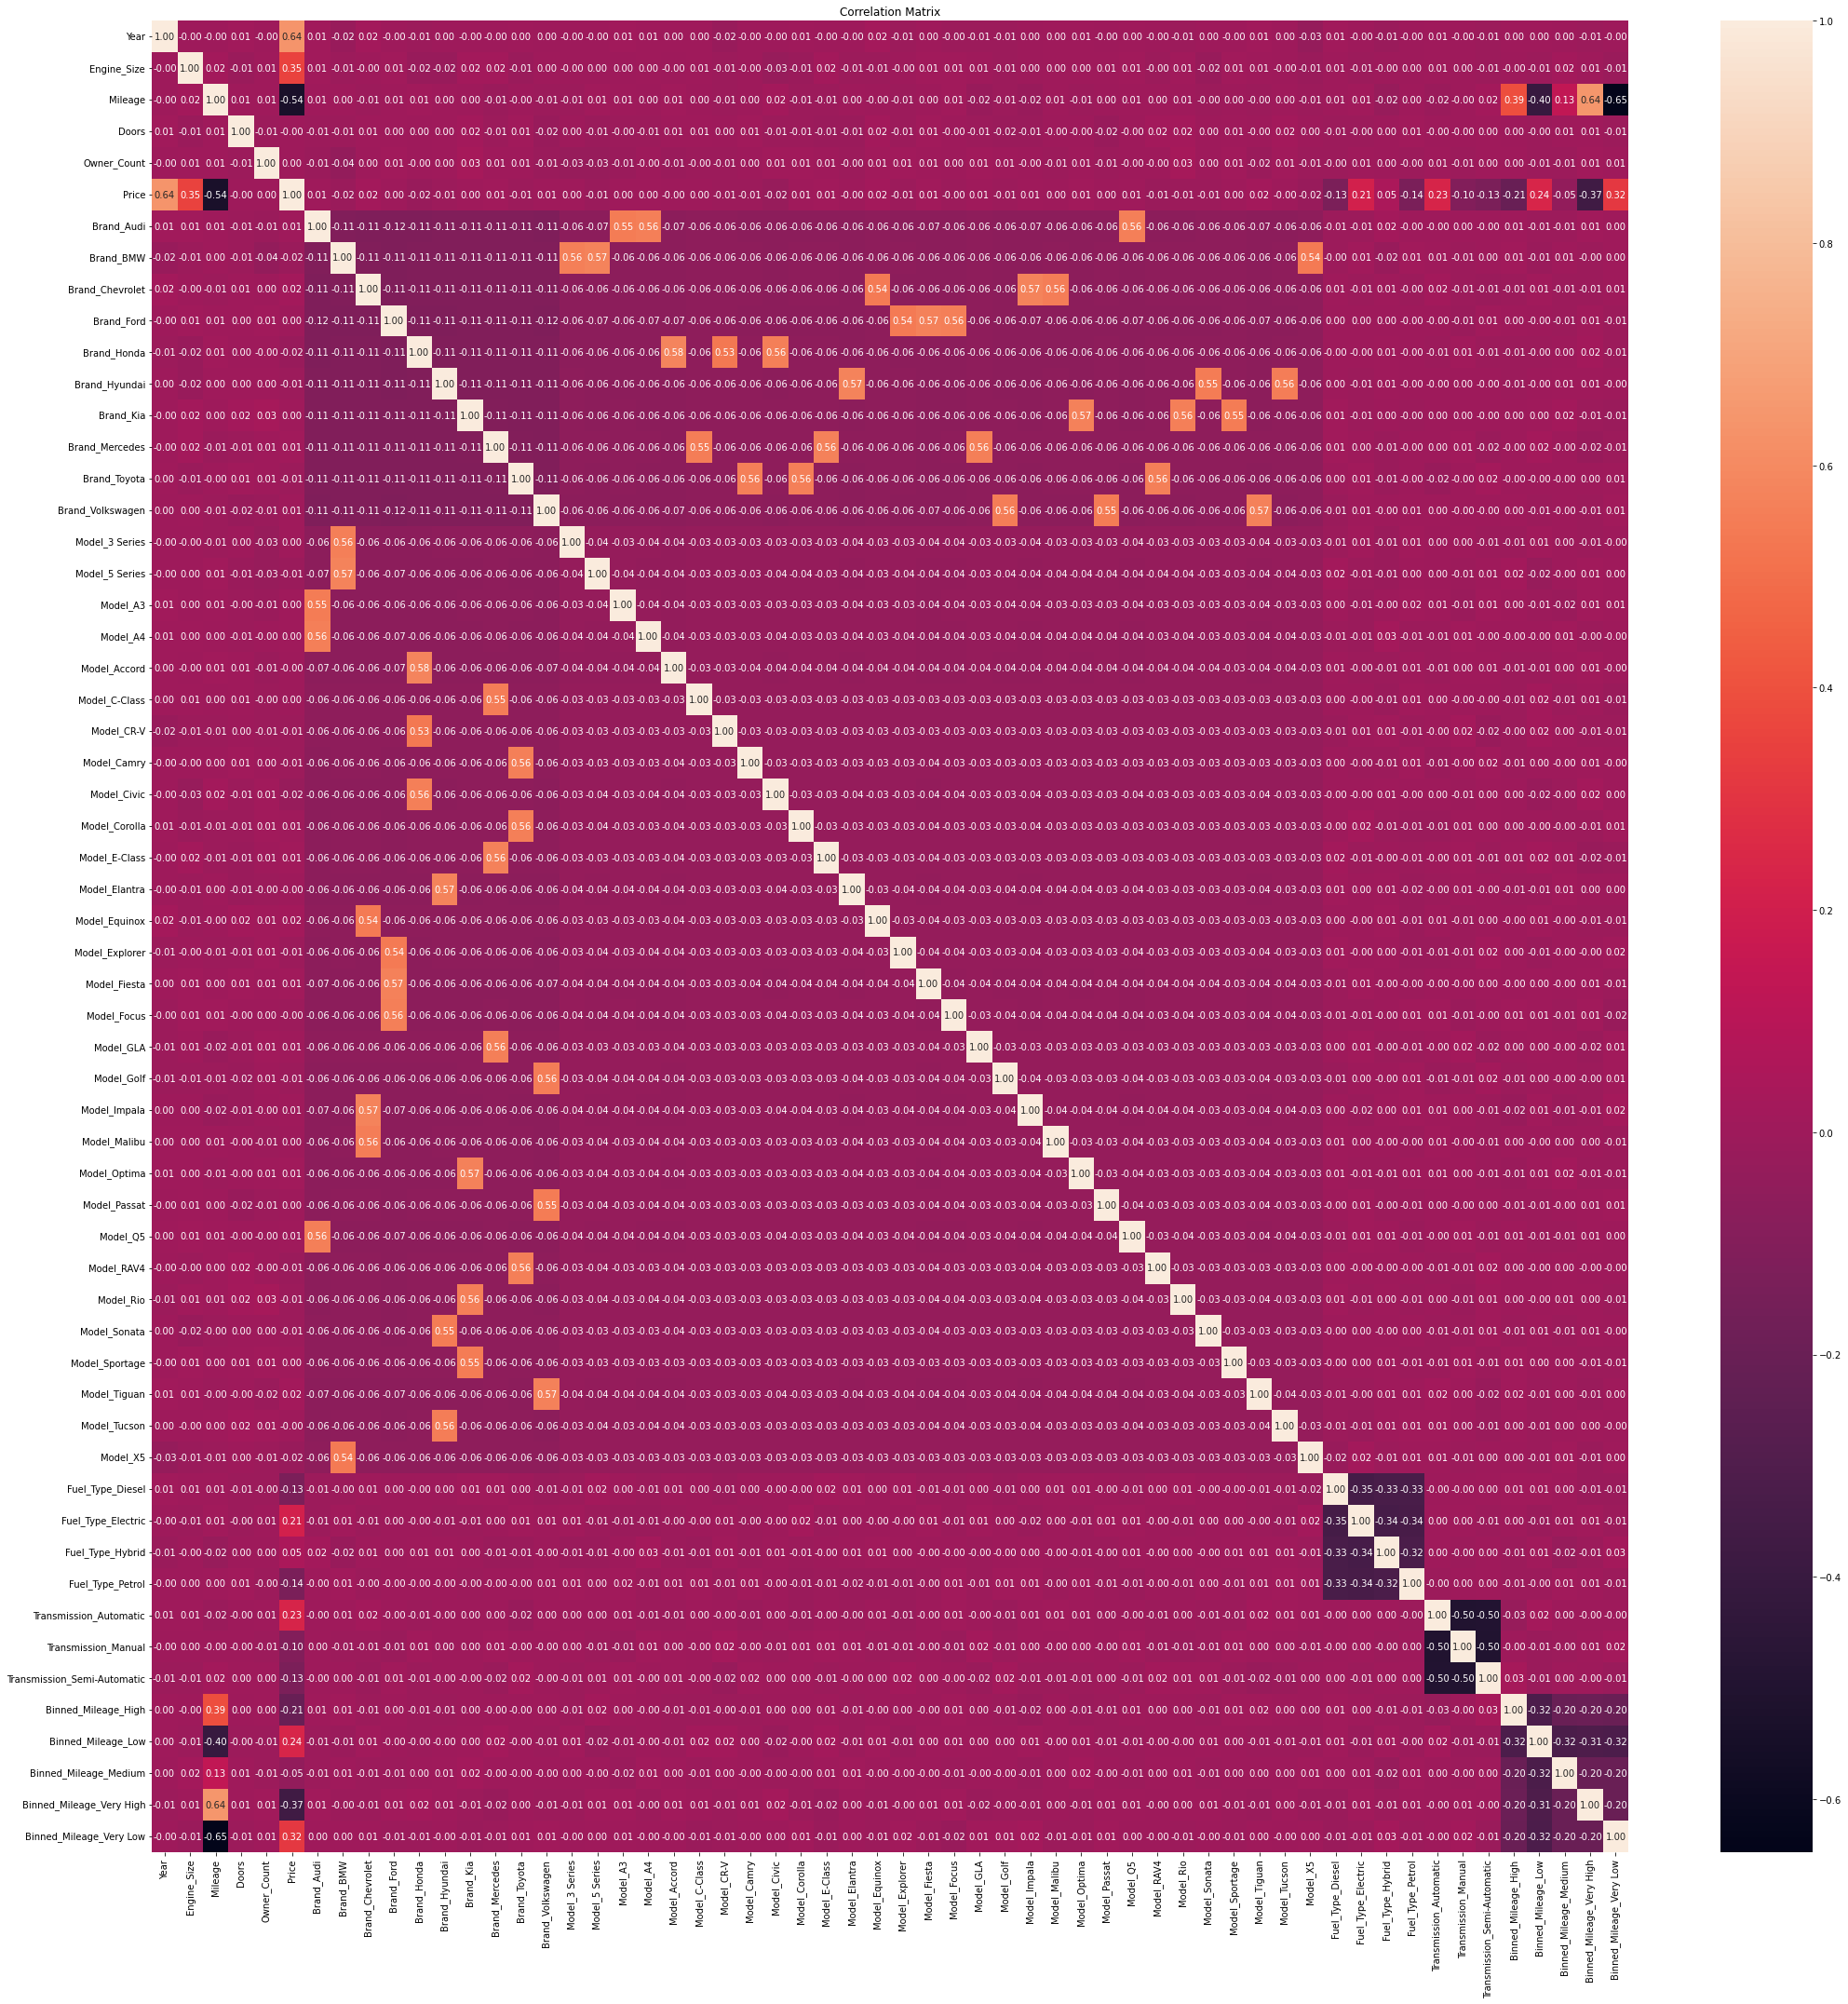

In [25]:
# Correlation matrix between the values
plt.figure(figsize=(30,30))
sns.heatmap(new_df.corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()

In [26]:
# Selecting the 10 most effective features on the target value
model_features = list(new_df.corr()['Price'].sort_values(ascending=False)[1:10].index)

# x is a variable that have the best 10 features and ready for the model training
# y is the target value (Price)
x = new_df[model_features]
y = new_df['Price']

In [27]:
# Linear Regression Model
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
model = LinearRegression()

# K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, x, y, cv=kfold, scoring='r2')

print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean R² Score: {np.mean(cv_scores)}")

Cross-Validation R² Scores: [0.87935762 0.88379635 0.87775723 0.8841148  0.87902984]
Mean R² Score: 0.8808111676747616


## SciPy Library 

In [36]:
# Preparing the dataset for Regression
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)

## Bias column
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]


In [42]:
# Apply Multiple linear regression 

# linear regression using least squares
coefficients, residuals, rank, s = lstsq(X_train, y_train)

# Extracting the intercept and slopes
intercept = coefficients[0]
slopes = coefficients[1:]

# prediction
y_pred = np.dot(X_test, coefficients)

print(f"Intercept: {intercept}")
print(f"Slopes: {slopes}")
print("         ")
print("------------------------------")
print("         ")
print(f"Coefficients: {coefficients}")
print("         ")
print("------------------------------")
print("         ")
print(f"Predicted values: {y_pred[:5]}")  # Show the first 5 predictions
print(f"Actual values: {y_test[:5].values}")

Intercept: 0.004115161025083789
Slopes: [0.12705219 0.48824413 0.33347602 0.19635689 0.24765478 0.12316992
 0.03318192 0.02566935]
Coefficients: [0.00411516 0.12705219 0.48824413 0.33347602 0.19635689 0.24765478
 0.12316992 0.03318192 0.02566935]
Predicted values: [9.13129092 8.69581342 9.18890318 8.6578246  8.85833459]
Actual values: [8.81195018 8.69265796 9.32767886 8.04334217 9.10675606]


In [43]:
# R² Calculation
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_residual = np.sum((y_test - y_pred) ** 2)
r_squared = 1 - (ss_residual / ss_total)

print(f"R-squared: {r_squared}")

R-squared: 0.5514492725477758


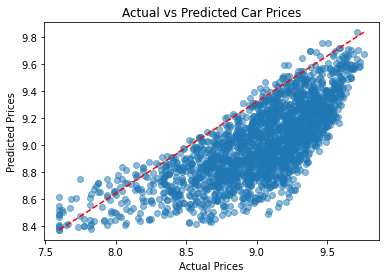

In [44]:
## plot of the linear line that fits the data 
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Car Prices")
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color="red", linestyle="--")
plt.show()